### Téléchargement des données

In [1]:
data_file = "villes-entrées-groupe-mobicoop.csv"

In [2]:
!wget https://lite.framacalc.org/9hr2-aradaudpcg-villes-entrées-groupe-mobicoop.csv -O $data_file

--2020-08-09 19:32:46--  https://lite.framacalc.org/9hr2-aradaudpcg-villes-entr%C3%A9es-groupe-mobicoop.csv
Resolving lite.framacalc.org (lite.framacalc.org)... 178.63.254.115, 2a01:4f8:140:9009::115
Connecting to lite.framacalc.org (lite.framacalc.org)|178.63.254.115|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2320 (2.3K) [text/csv]
Saving to: ‘villes-entrées-groupe-mobicoop.csv’

villes-entrées-grou 100%[===================>]   2.27K  --.-KB/s    in 0s      

2020-08-09 19:32:47 (87.0 MB/s) - ‘villes-entrées-groupe-mobicoop.csv’ saved [2320/2320]



### Classement des villes par occurence

In [3]:
!cat $data_file | tail -n+2 |\
    sed -e 's_ *, *_\n_g'\
        -e 's_ *" *__g;s_^ *__;s_ *$__' |\
    sed -e 's_^._\U&_' |\
    grep -v -P '^$' |\
    sort | uniq -c | sort -r |\
    sed 's_^ *\([0-9]\+\) *\(.*\)$_\1,\2_' > villes-entrees-sorted.csv

In [4]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

In [5]:
villes = pd.read_csv("villes-entrees-sorted.csv", names=["Total", "Ville"]).set_index(["Ville"])

In [6]:
villes.head(2)

Total
Ville            
Lyon            9
Strasbourg      8

In [7]:
gps_list = []

for row in villes.iterrows():    
    total = row[1].Total
    city = row[0]
    !if [ ! -f cities/"$city".json ] ;then wget https://nominatim.openstreetmap.org/search/"$city"?format=json -O cities/"$city".json 2>> /tmp/err;fi
    
    lat = !cat cities/"$city".json |jq '.[0].lat' | sed 's_"__g'
    lon = !cat cities/"$city".json |jq '.[0].lon' | sed 's_"__g'
    
    try:
        gps_list.append({
            "city": city,
            "total": total,
            "lat": lat[0],
            "lon": lon[0]
        })

    except:
        print(city)

In [8]:
gps = pd.DataFrame(gps_list).set_index(["city"])

In [9]:
gps = gps[gps.lat != "null"]

In [ ]:
gdf = gpd.GeoDataFrame(
    gps, geometry=gpd.points_from_xy(gps.lon, gps.lat))

In [11]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [12]:
from datetime import datetime


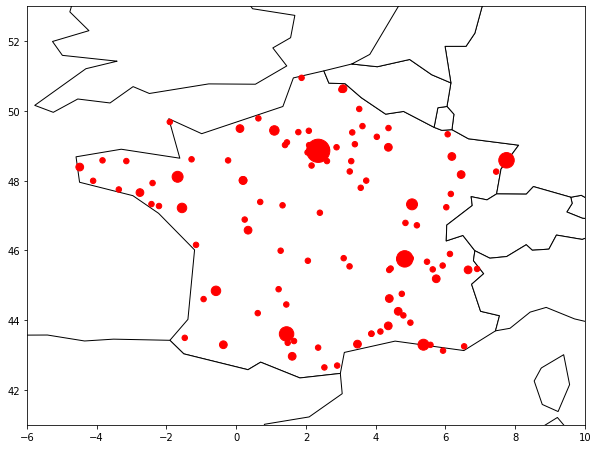

In [13]:
ax = world.plot(color='white', edgecolor='black', figsize=(10,10))
ax.set_xlim(-6,10)
ax.set_ylim(41,53)

gdf.plot(ax=ax, color='red', markersize = gps.total * 30)

today_filename = "images/ville-de-residence-{}.png".format(datetime.strftime(datetime.now(), "%Y-%m-%d"))

plt.savefig(today_filename)

In [14]:
from IPython.display import Image

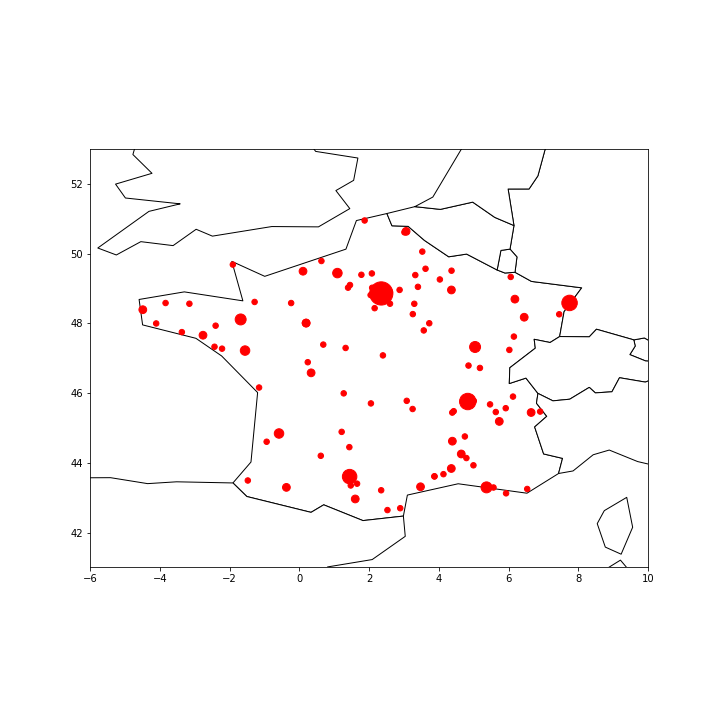

In [16]:
Image(today_filename)

In [18]:
!convert -delay 30  -size 100x100 -loop 0 images/ville-de-residence-* ville-de-residence.gif

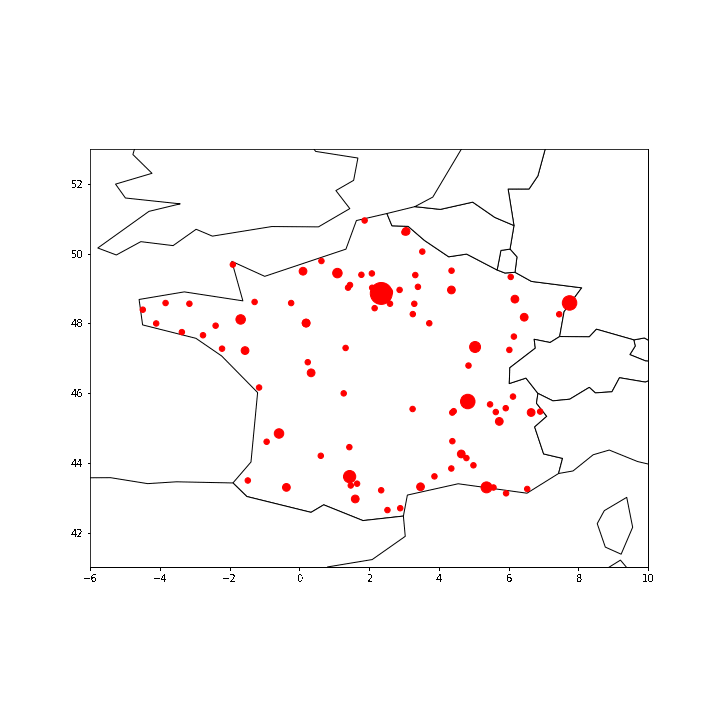

In [20]:
Image("ville-de-residence.gif")